In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed.csv")
GCoplua_df = pd.read_csv('Data/Synthetic_Datasets/GaussianCopula/fake_gaussian_data_1.csv')

In [4]:
print('Gaussian Copula Dataset')
display(GCoplua_df.head())

Gaussian Copula Dataset


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.685782          0.534566    -0.562275        1.446703   0.544947   
1       1.208812          0.136434    -0.115773        1.129072  -0.257352   
2      -0.284094         -0.419029    -0.341098        3.073172  -0.722792   
3      -0.752235          0.887516    -1.944261        1.119922  -0.178811   
4       1.726842         -0.363878     0.115516       -1.570334   0.182324   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.874786              0.260062  1.323753  4.923029  -0.197822   
1             1.202660             -0.384883  0.802714  4.923029   0.470408   
2             0.926149              0.759000  0.494255  4.923015  -0.202532   
3            -0.531659             -0.648032  0.337868  4.922957  -0.220949   
4             0.790196             -0.675228 -0.510880  4.922989  -0.007073   

    alcohol   quality   type  
0 -0.817139  3.643685    red  
1 -0.351553  3.643685  white  
2 -0.022502  3.643685  white  
3 -0.502068  3.643685  white  
4 -0.434881  3.643685  white

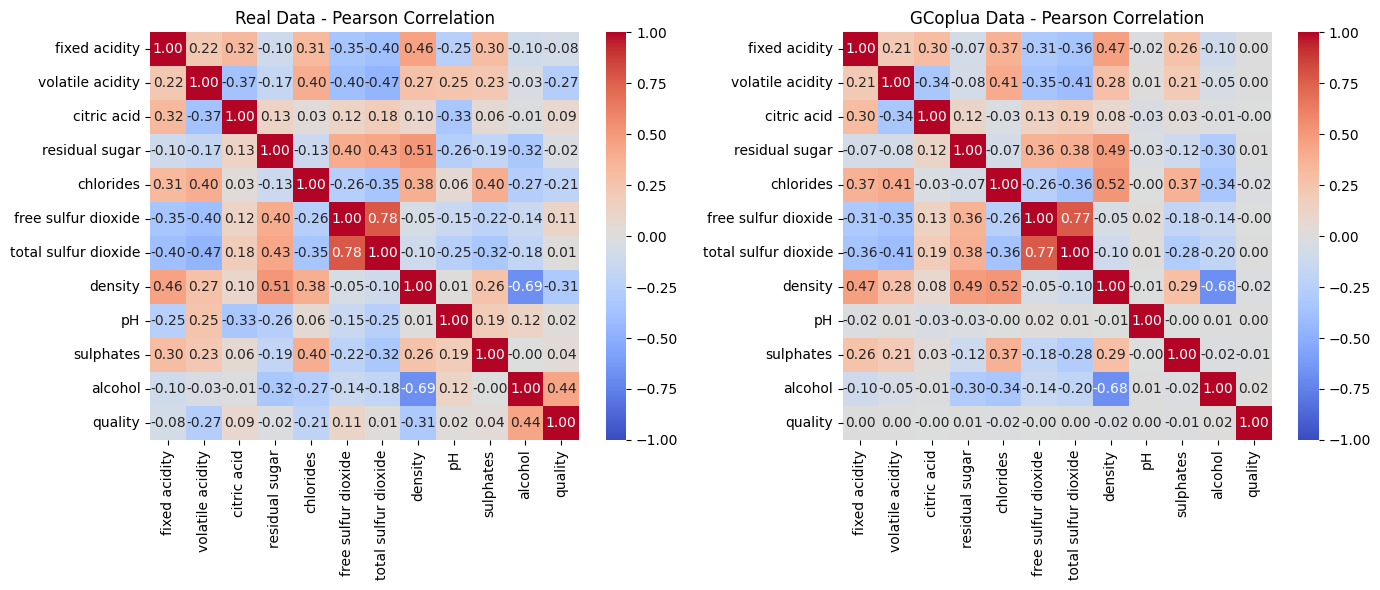

In [6]:
real_num = real_df.select_dtypes(include='number')
GCoplua_num = GCoplua_df.select_dtypes(include='number')

real_pearson = real_num.corr(method='pearson')
GCoplua_pearson = GCoplua_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Real Data - Pearson Correlation')

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(GCoplua_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('GCoplua Data - Pearson Correlation')

plt.tight_layout()
plt.show()

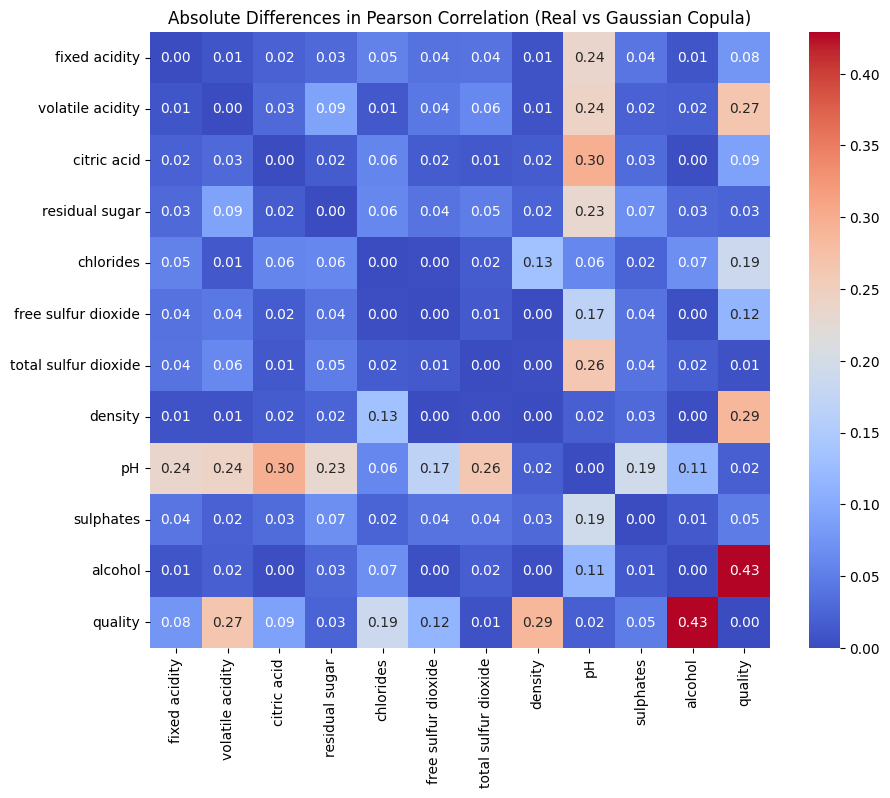

In [9]:
diff_GCoplua = (real_pearson - GCoplua_pearson).abs()
plt.figure(figsize=(10, 8))
sns.heatmap(diff_GCoplua, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Absolute Differences in Pearson Correlation (Real vs Gaussian Copula)")
plt.show()

In [10]:
# Compute absolute differences (you already have diff_df)
abs_diff = diff_GCoplua.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff:", round(vals.mean(), 3))

# Find top 3 biggest drifts
pairs = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    pairs.append((abs_diff.iloc[i, j], diff_GCoplua.columns[i], diff_GCoplua.columns[j]))
top3 = sorted(pairs, reverse=True)[:3]
print("Top 3 biggest correlation shifts:")
for diff, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {diff:.2f}")

Mean absolute Pearson diff: 0.072
Top 3 biggest correlation shifts:
  'alcohol' vs 'quality': Δ = 0.43
  'citric acid' vs 'pH': Δ = 0.30
  'density' vs 'quality': Δ = 0.29


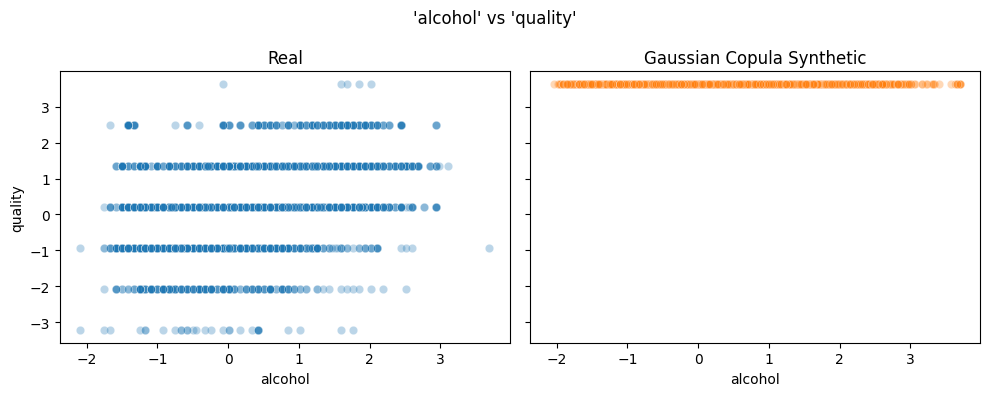

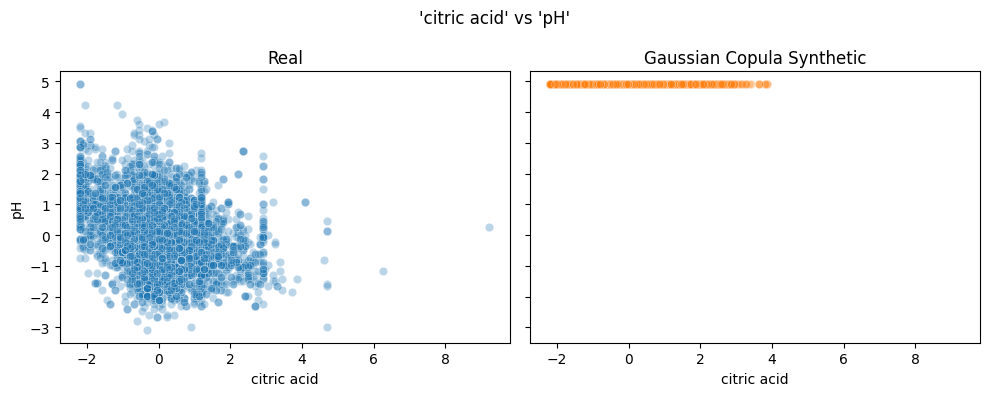

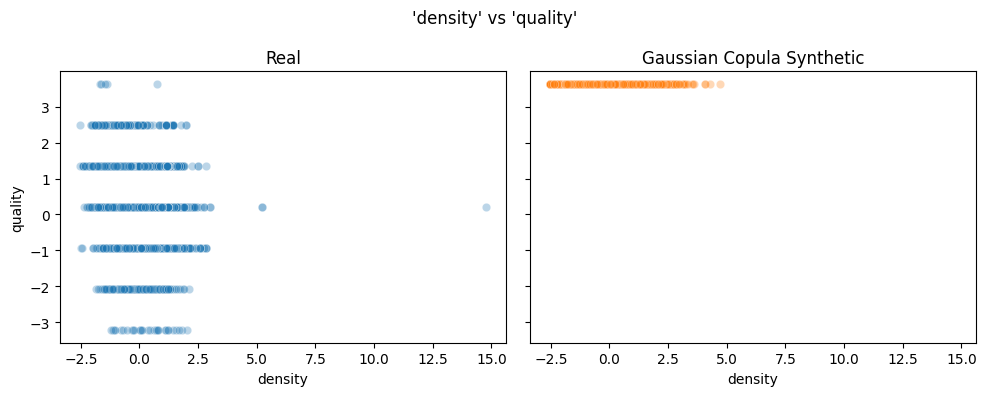

In [13]:
for x,y in [("alcohol","quality"),
            ("citric acid","pH"),
            ("density","quality")]:
    fig, axes = plt.subplots(1,2,figsize=(10,4), sharex=True, sharey=True)
    sns.scatterplot(data=real_df, x=x, y=y, ax=axes[0], alpha=0.3)
    axes[0].set_title("Real")
    sns.scatterplot(data=GCoplua_df, x=x, y=y, ax=axes[1], alpha=0.3, color="C1")
    axes[1].set_title("Gaussian Copula Synthetic")
    plt.suptitle(f"{x!r} vs {y!r}")
    plt.tight_layout()
    plt.show()

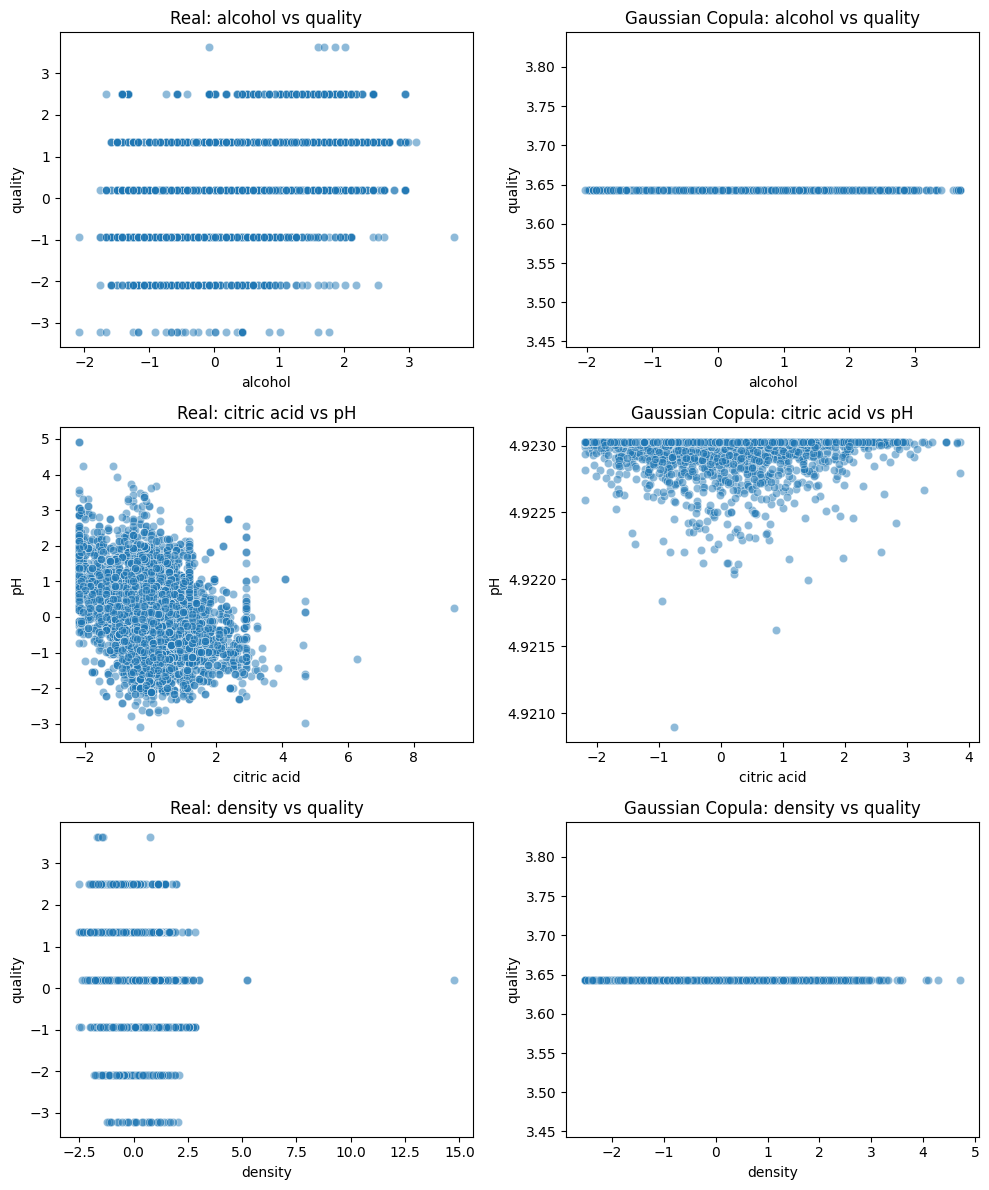

In [15]:
pairs = [
    ("alcohol", "quality"),
    ("citric acid", "pH"),
    ("density", "quality"),
]

# Create subplots
fig, axes = plt.subplots(len(pairs), 2, figsize=(10, 12))
fig.tight_layout(pad=5.0)

for i, (x, y) in enumerate(pairs):
    # Real data
    sns.scatterplot(data=real_df, x=x, y=y, ax=axes[i, 0], alpha=0.5)
    axes[i, 0].set_title(f"Real: {x} vs {y}")

    # Synthetic data
    sns.scatterplot(data=GCoplua_df, x=x, y=y, ax=axes[i, 1], alpha=0.5)
    axes[i, 1].set_title(f"Gaussian Copula: {x} vs {y}")

plt.tight_layout()
plt.show()

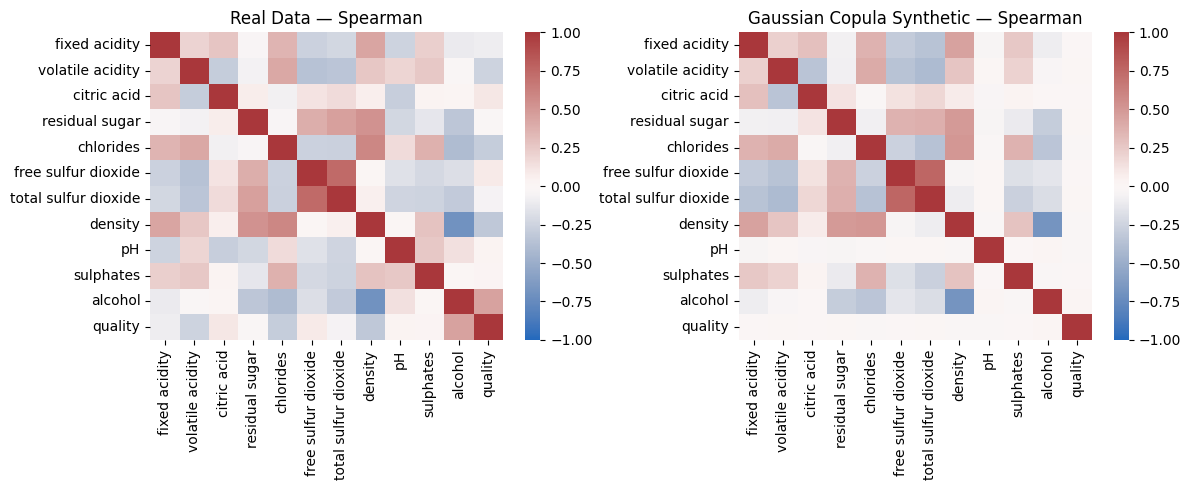

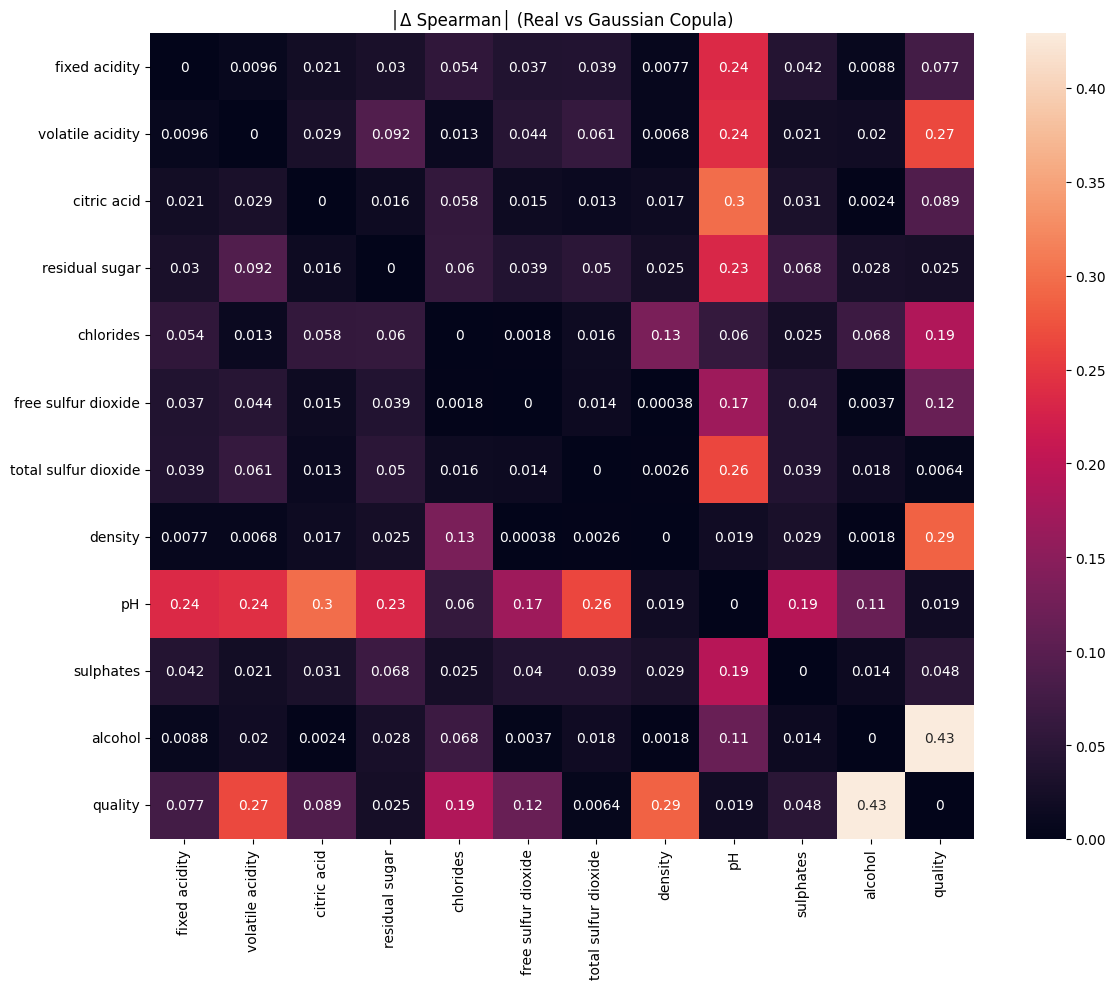

In [17]:
real_spear = real_num.corr(method="spearman")
GCoplua_spear  = GCoplua_num.corr(method="spearman")

# 4) Plot side by side
fig, axes = plt.subplots(1,2,figsize=(12,5), tight_layout=True)
sns.heatmap(real_spear, vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[0])
axes[0].set_title("Real Data — Spearman")
sns.heatmap(GCoplua_spear,  vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[1])
axes[1].set_title("Gaussian Copula Synthetic — Spearman")
plt.show()

# 5) Compute & plot absolute‐difference
diff_spear = (GCoplua_spear - real_spear).abs().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(diff_GCoplua, vmin=0, vmax=diff_GCoplua.values.max(), cmap="rocket", annot=True)
plt.title("│Δ Spearman│ (Real vs Gaussian Copula)")
plt.tight_layout()
plt.show()


In [18]:
i,j = np.triu_indices_from(diff_spear, k=1)
print("Mean │Δ Spearman│:", diff_GCoplua.values[i,j].mean().round(3))


Mean │Δ Spearman│: 0.072


In [19]:
i, j = np.triu_indices_from(diff_spear, k=1)
pairs = [(diff_spear.values[i_, j_], diff_spear.columns[i_], diff_spear.columns[j_])
         for i_, j_ in zip(i, j)]

# Sort and take top 3
top3 = sorted(pairs, reverse=True)[:3]

# Print nicely
print("Top 3 biggest Spearman shifts:")
for delta, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {delta:.2f}")


Top 3 biggest Spearman shifts:
  'alcohol' vs 'quality': Δ = 0.43
  'density' vs 'quality': Δ = 0.30
  'chlorides' vs 'quality': Δ = 0.27
